In [1]:
import textacy
import spacy
spacy.load('en')
import pandas as pd
import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.


In [ ]:
# Readability stats must be run on text that is not pre

In [2]:
from time import time

In [25]:
okc = pd.read_csv('../Assets/A/train.csv')

In [26]:
# Work with only first 10,000 rows for time management
okc = okc.iloc[:1000,]

In [32]:
# drop null values and convert to unicode
okc = okc[okc.essay0.notnull()]
okc.essay0 = okc.essay0.apply(unicode)

In [33]:
t0 = time()
# Convert long essay to unicode
okc.essays = okc.essay0.apply(unicode)

# Save long essay as list of dictionaries
essay_d = okc.to_dict(orient='records')

# Save essay text as content_stream, holding onto other info as metadata
content_stream, metadata_stream = textacy.fileio.split_content_and_metadata(essay_d, 'essay0', itemwise=False)

# load to textcorpus
corpus = textacy.TextCorpus.from_texts('en', content_stream, metadata_stream, n_threads=2)

print "Corpus loaded in %g seconds" %(time() - t0)

Corpus loaded in 9.28986 seconds


In [34]:
corpus[0].readability_stats

{u'automated_readability_index': -0.7487500000000011,
 u'coleman_liau_index': 1.3252582916666675,
 u'flesch_kincaid_grade_level': 1.788333333333334,
 u'flesch_readability_ease': 96.49000000000002,
 u'gunning_fog_index': 3.2,
 u'n_chars': 85,
 u'n_polysyllable_words': 0,
 u'n_sents': 3,
 u'n_syllables': 29,
 u'n_unique_words': 19,
 u'n_words': 24,
 u'smog_index': 3.1291}

In [35]:
corpus[1].readability_stats

{u'automated_readability_index': 0.5278787878787874,
 u'coleman_liau_index': 1.2529375454545466,
 u'flesch_kincaid_grade_level': 1.9309090909090898,
 u'flesch_readability_ease': 87.749696969697,
 u'gunning_fog_index': 1.4666666666666668,
 u'n_chars': 47,
 u'n_polysyllable_words': 0,
 u'n_sents': 3,
 u'n_syllables': 15,
 u'n_unique_words': 11,
 u'n_words': 11,
 u'smog_index': 3.1291}

In [50]:
corpus[3].readability_stats.items()

[(u'flesch_kincaid_grade_level', 3.7105161290322606),
 (u'smog_index', 8.238735603445708),
 (u'automated_readability_index', 3.078225806451613),
 (u'n_chars', 241),
 (u'n_unique_words', 49),
 (u'n_words', 62),
 (u'n_syllables', 76),
 (u'coleman_liau_index', 4.668674887096778),
 (u'gunning_fog_index', 7.540645161290323),
 (u'flesch_readability_ease', 90.5457741935484),
 (u'n_sents', 5),
 (u'n_polysyllable_words', 4)]

In [55]:
corpus[1]

TextDoc(15 tokens; ""i imagine that yes is the only living thing." ...")

In [49]:
# Extract feature names from readability stats
stats = corpus[0].readability_stats.keys()

In [56]:
t0 = time()
readability = pd.DataFrame(index=range(len(corpus)), columns=stats)

for i in range(len(corpus)):
    for stat in corpus[i].readability_stats.items():
        readability.ix[i, stat[0]] = stat[1]
        
print time()-t0

2.77469801903


In [58]:
readability.head()

,flesch_kincaid_grade_level,smog_index,automated_readability_index,n_chars,n_unique_words,n_words,n_syllables,coleman_liau_index,gunning_fog_index,flesch_readability_ease,n_sents,n_polysyllable_words
0,1.78833,3.1291,-0.74875,85,19,24,29,1.32526,3.2,96.49,3,0
1,1.93091,3.1291,0.527879,47,11,11,15,1.25294,1.46667,87.7497,3,0
2,5.50871,8.23874,6.02544,328,65,79,100,6.73913,8.34532,83.7094,5,4
3,3.71052,8.23874,3.07823,241,49,62,76,4.66867,7.54065,90.5458,5,4
4,4.99329,9.33951,3.31713,554,89,143,188,4.70253,8.83636,82.4176,11,13


In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

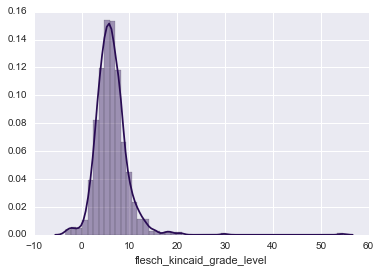

In [82]:
sns.distplot(readability.flesch_kincaid_grade_level)
sns.set_palette('inferno')

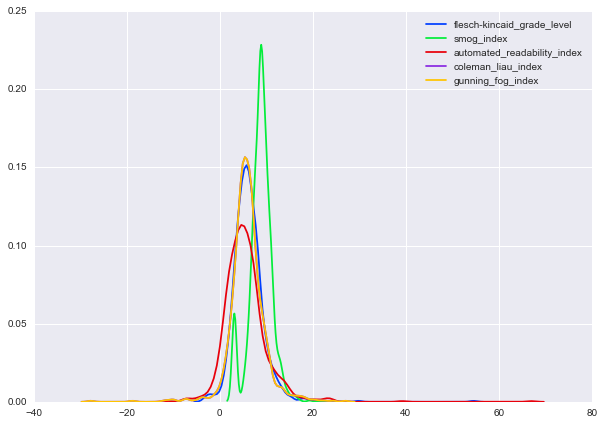

In [83]:
plt.figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
sns.set_palette("bright")
sns.kdeplot(readability.flesch_kincaid_grade_level, label="flesch-kincaid_grade_level")
sns.kdeplot(readability.smog_index, label="smog_index")
sns.kdeplot(readability.automated_readability_index, label="automated_readability_index")
sns.kdeplot(readability.coleman_liau_index, label="coleman_liau_index")
sns.kdeplot(readability.coleman_liau_index, label="gunning_fog_index")
plt.legend();

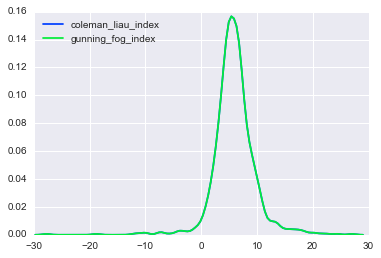

In [85]:
# Coleman-Liau index and Gunning Fog Index are distributed almost identically
# However, each individual essay has quite different values
 
sns.kdeplot(readability.coleman_liau_index, label="coleman_liau_index")
sns.kdeplot(readability.coleman_liau_index, label="gunning_fog_index")

In [ ]:
# Make correlation heatmap between different indices?

In [ ]:
# Do some scatter plots between features

In [ ]:
# Model job type and education level.  See if you can predict?